## Comparative by state in Mexico 

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2010 and 2021. Also between 2016 and 2021

#### The border states are: Baja California, Sonora, Tamaulipas, Coahuila, Chihuahua and Nuevo Leon.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
## small trick to improve our display
## Unfortunately appears not to work in Colab.
## will allow us to see dataframes side-by-side
from IPython.display import display, HTML

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [3]:
## run the display code here
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Open Manufacturing workers data
df = pd.read_csv("data/workers-factories-wages-mexico-annual.csv")
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,"1,902,121.00","5,140.00","13,120.12"
1,2008,Total nacional,No,"1,738,182.00","5,254.00","13,360.18"
2,2009,Total nacional,No,"1,645,291.00","5,214.00","14,170.41"
3,2010,Total nacional,No,"1,810,482.00","5,108.00","13,945.50"
4,2011,Total nacional,No,"1,879,114.00","5,079.00","14,183.43"
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,"134,260.00",266.00,"13,080.53"
281,2018,Otras entidades federativas,No,"143,292.00",264.00,"12,842.36"
282,2019,Otras entidades federativas,No,"142,102.00",267.00,"12,634.71"
283,2020,Otras entidades federativas,No,"135,569.00",264.00,"14,349.70"


## Jobs

In [5]:
df2 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Jobs', index=['State','Border'], columns='Year')
df2

,Year,2010,2021
State,Border,,
Aguascalientes,No,"37,967.00","63,036.00"
Baja California,Yes,"216,912.00","364,420.00"
Chihuahua,Yes,"245,815.00","408,068.00"
Ciudad de Mexico,No,"51,311.00","21,499.00"
Coahuila de Zaragoza,Yes,"165,669.00","264,349.00"
Durango,No,"25,165.00","46,152.00"
Guanajuato,No,"70,660.00","163,990.00"
Jalisco,No,"102,031.00","156,146.00"
Mexico,No,"117,900.00","138,471.00"


In [6]:
df2["Jobs pct chg 2010 - 2021"] = (df2[2021] / df2[2010] - 1) * 100
df2

,Year,2010,2021,Jobs pct chg 2010 - 2021
State,Border,,,
Aguascalientes,No,"37,967.00","63,036.00",66.03
Baja California,Yes,"216,912.00","364,420.00",68.00
Chihuahua,Yes,"245,815.00","408,068.00",66.01
Ciudad de Mexico,No,"51,311.00","21,499.00",-58.10
Coahuila de Zaragoza,Yes,"165,669.00","264,349.00",59.56
Durango,No,"25,165.00","46,152.00",83.40
Guanajuato,No,"70,660.00","163,990.00",132.08
Jalisco,No,"102,031.00","156,146.00",53.04
Mexico,No,"117,900.00","138,471.00",17.45


In [7]:
df2.sort_values(by= ["Jobs pct chg 2010 - 2021"], ascending = False)

,Year,2010,2021,Jobs pct chg 2010 - 2021
State,Border,,,
Guanajuato,No,"70,660.00","163,990.00",132.08
Queretaro,No,"52,887.00","107,124.00",102.55
San Luis Potosi,No,"46,141.00","90,954.00",97.12
Durango,No,"25,165.00","46,152.00",83.40
Baja California,Yes,"216,912.00","364,420.00",68.00
Aguascalientes,No,"37,967.00","63,036.00",66.03
Chihuahua,Yes,"245,815.00","408,068.00",66.01
Coahuila de Zaragoza,Yes,"165,669.00","264,349.00",59.56
Tamaulipas,Yes,"162,298.00","258,257.00",59.13


### Conclusions
##### Among the states where manufacturing employment grew the most, some are not on the border. 
##### That is the case of Guanajuato, Queretaro, San Luis Potosi or Durango. ( Although Durango is close to the border.)
#### Four of the six border states are above the national average. The only exceptions are Nuevo Leon and Sonora.
#### This may indicate two possibilities: 
#### 1. The nearshoring effect is not concentrated exclusively at the border. 
#### 2. Other simultaneous phenomena may be driving manufacturing employment upward in Mexico. 

### Comparison with the population

In [8]:
# open population data
dfp = pd.read_csv("data/mexico-population-refined.csv")
dfp

,State,2010,2021,Border
0,Total nacional,112336538,126014024,No
1,Aguascalientes,1184996,1425607,No
2,Baja California,3155070,3769020,Yes
3,Baja California Sur,637026,798447,No
4,Campeche,822441,928363,No
5,Coahuila de Zaragoza,2748391,3146771,Yes
6,Colima,650555,731391,No
7,Chiapas,4796580,5543828,No
8,Chihuahua,3406465,3741869,Yes
9,Ciudad de Mexico,8851080,9209944,No


In [12]:
## merge
df_jp = pd.merge(df2, dfp,left_on = ["State", "Border"], right_on = ["State","Border"])
df_jp

,State,Border,2010,2021,Jobs pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
0,Aguascalientes,No,"37,967.00","63,036.00",66.03,1184996,1425607,120.30
1,Baja California,Yes,"216,912.00","364,420.00",68.00,3155070,3769020,119.46
2,Chihuahua,Yes,"245,815.00","408,068.00",66.01,3406465,3741869,109.85
3,Ciudad de Mexico,No,"51,311.00","21,499.00",-58.10,8851080,9209944,104.05
4,Coahuila de Zaragoza,Yes,"165,669.00","264,349.00",59.56,2748391,3146771,114.50
5,Durango,No,"25,165.00","46,152.00",83.40,1632934,1832650,112.23
6,Guanajuato,No,"70,660.00","163,990.00",132.08,5486372,6166934,112.40
7,Jalisco,No,"102,031.00","156,146.00",53.04,7350682,8348151,113.57
8,Mexico,No,"117,900.00","138,471.00",17.45,15175862,16992418,111.97
9,Nuevo Leon,Yes,"218,776.00","311,784.00",42.51,4653458,5784442,124.30


In [13]:
dfb = df_jp.query("Border == 'Yes'")
dfb

,State,Border,2010,2021,Jobs pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
1,Baja California,Yes,"216,912.00","364,420.00",68.00,3155070,3769020,119.46
2,Chihuahua,Yes,"245,815.00","408,068.00",66.01,3406465,3741869,109.85
4,Coahuila de Zaragoza,Yes,"165,669.00","264,349.00",59.56,2748391,3146771,114.50
9,Nuevo Leon,Yes,"218,776.00","311,784.00",42.51,4653458,5784442,124.30
13,Sonora,Yes,"93,235.00","130,031.00",39.47,2662480,2944840,110.61
14,Tamaulipas,Yes,"162,298.00","258,257.00",59.13,3268554,3527735,107.93


In [14]:
dfnb = df_jp.query("Border == 'No'")
dfnb

,State,Border,2010,2021,Jobs pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
0,Aguascalientes,No,"37,967.00","63,036.00",66.03,1184996,1425607,120.30
3,Ciudad de Mexico,No,"51,311.00","21,499.00",-58.10,8851080,9209944,104.05
5,Durango,No,"25,165.00","46,152.00",83.40,1632934,1832650,112.23
6,Guanajuato,No,"70,660.00","163,990.00",132.08,5486372,6166934,112.40
7,Jalisco,No,"102,031.00","156,146.00",53.04,7350682,8348151,113.57
8,Mexico,No,"117,900.00","138,471.00",17.45,15175862,16992418,111.97
10,Puebla,No,"71,544.00","79,592.00",11.25,5779829,6583278,113.90
11,Queretaro,No,"52,887.00","107,124.00",102.55,1827937,2368467,129.57
12,San Luis Potosi,No,"46,141.00","90,954.00",97.12,2585518,2822255,109.16
15,Total nacional,No,"1,810,482.00","2,791,909.00",54.21,112336538,126014024,112.18


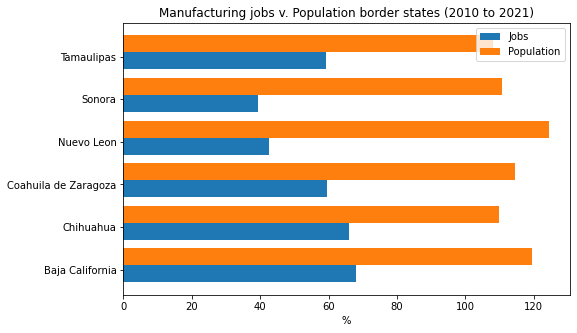

In [15]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfb['Jobs pct chg 2010 - 2021']
serie2 = dfb['Population pct chg 2010 - 2021']

# Crear los índices para las barras
ind = np.arange(len(serie1))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, serie1, height=0.4, align='center', label='Jobs')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, serie2, height=0.4, align='edge', label='Population')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Manufacturing jobs v. Population border states (2010 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(list(dfb["State"]))

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

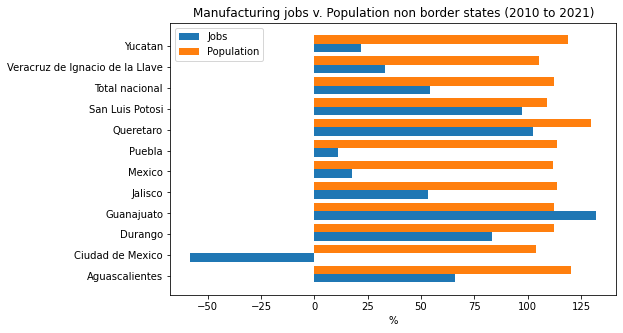

In [16]:
import matplotlib.pyplot as plt

# Datos de las series
serie1 = dfnb['Jobs pct chg 2010 - 2021']
serie2 = dfnb['Population pct chg 2010 - 2021']

# Crear los índices para las barras
ind = np.arange(len(serie1))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, serie1, height=0.4, align='center', label='Jobs')

# Crear las barras para la serie 2
ax.barh(ind + 0.1, serie2, height=0.4, align='edge', label='Population')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Manufacturing jobs v. Population non border states (2010 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(list(dfnb["State"]))

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

#### Conclusions
##### In most states manufacturing employment grew faster than population. The exceptions are Mexico City and Puebla. 
##### In the border states, employment growth was considerably higher than population growth.
##### 1. Baja California: 68% employment growth and 19% population growth.
##### 2. Chihuahua: 66% employment growth and 10% population growth.
##### 3. Coahuila: 60% employment growth and 14% population growth
##### 4. Tamaulipas: 59% employment growth and 8% population growth
##### 5. Nuevo Leon: 42% employment growth and 24% population growth  
##### 6. Sonora: 39% growth in employment and 11% growth in population

#### This shows that there is a process of accelerated industrialization on the border. But also in the rest of the country (see above).

## Wages


In [17]:
df3 = pd.DataFrame()
df3 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Average wage', index=['State','Border'], columns='Year')
df3

,Year,2010,2021
State,Border,,
Aguascalientes,No,"14,748.68","18,225.56"
Baja California,Yes,"13,056.75","17,196.48"
Chihuahua,Yes,"10,580.19","13,828.38"
Ciudad de Mexico,No,"22,707.69","23,832.28"
Coahuila de Zaragoza,Yes,"13,507.36","17,075.26"
Durango,No,"7,479.49","9,464.91"
Guanajuato,No,"12,089.01","17,251.15"
Jalisco,No,"15,455.90","20,461.99"
Mexico,No,"22,604.22","20,998.42"


In [18]:
df3["Wages pct chg 2010 - 2021"] = (df3[2021] / df3[2010] - 1) * 100
df3 = df3.sort_values(by= ["Wages pct chg 2010 - 2021"], ascending = False)
df3

,Year,2010,2021,Wages pct chg 2010 - 2021
State,Border,,,
Veracruz de Ignacio de la Llave,No,"16,712.97","26,300.53",57.37
San Luis Potosi,No,"12,885.84","19,035.93",47.73
Guanajuato,No,"12,089.01","17,251.15",42.70
Nuevo Leon,Yes,"15,722.89","21,112.53",34.28
Sonora,Yes,"11,689.09","15,660.36",33.97
Otras entidades federativas,No,"12,702.66","16,852.90",32.67
Jalisco,No,"15,455.90","20,461.99",32.39
Baja California,Yes,"13,056.75","17,196.48",31.71
Chihuahua,Yes,"10,580.19","13,828.38",30.70


In [19]:
## merge
df4 = pd.merge(df3, dfp,left_on = ["State", "Border"], right_on = ["State","Border"])
df4

,State,Border,2010,2021,Wages pct chg 2010 - 2021,2010,2021,Population pct chg 2010 - 2021
0,Veracruz de Ignacio de la Llave,No,"16,712.97","26,300.53",57.37,7643194,8062579,105.49
1,San Luis Potosi,No,"12,885.84","19,035.93",47.73,2585518,2822255,109.16
2,Guanajuato,No,"12,089.01","17,251.15",42.70,5486372,6166934,112.40
3,Nuevo Leon,Yes,"15,722.89","21,112.53",34.28,4653458,5784442,124.30
4,Sonora,Yes,"11,689.09","15,660.36",33.97,2662480,2944840,110.61
5,Jalisco,No,"15,455.90","20,461.99",32.39,7350682,8348151,113.57
6,Baja California,Yes,"13,056.75","17,196.48",31.71,3155070,3769020,119.46
7,Chihuahua,Yes,"10,580.19","13,828.38",30.70,3406465,3741869,109.85
8,Durango,No,"7,479.49","9,464.91",26.54,1632934,1832650,112.23
9,Coahuila de Zaragoza,Yes,"13,507.36","17,075.26",26.41,2748391,3146771,114.50


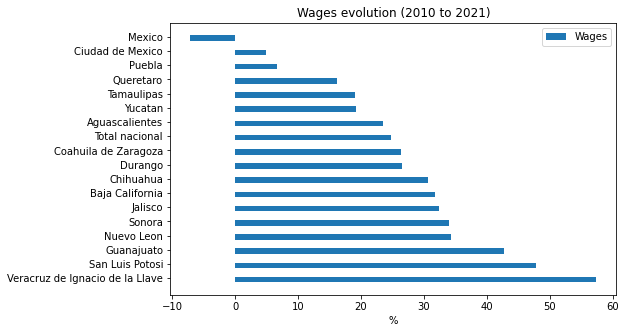

In [20]:
# Datos de las series
serie1 = df4['Wages pct chg 2010 - 2021']

# Crear los índices para las barras
ind = np.arange(len(serie1))

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 5))

# Crear las barras para la serie 1
ax.barh(ind - 0.1, serie1, height=0.4, align='center', label='Wages')

# Configurar los ejes y etiquetas
ax.set_xlabel('%')
ax.set_title('Wages evolution (2010 to 2021)')
ax.set_yticks(ind)
ax.set_yticklabels(list(df4["State"]))

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico de barras horizontal
plt.show()

### Conclusions
##### Among the states where manufacturing real wages grew the most, some are not on the border. 
##### That is the case of Veracruz, San Luis Potosi, or Guanajuato. 
#### Five of the six border states are above the national average. The only exception is Tamaulipas.
#### This may indicate two possibilities: 
#### 1. The nearshoring effect is not concentrated exclusively at the border. 
#### 2. Other simultaneous phenomena may be driving manufacturing employment upward in Mexico. 